In [1]:
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import xarray as xr

from WD.plotting import plot_map, add_label_to_axes

# Do some example plots: 

Choose a variable from weatherbench and randomly select for time steps

In [2]:
# usually this would go on top of the notebook:
plt.rcParams.update({'font.size': 8})  # sets font size for all cells
plt.rcParams['figure.dpi'] = 300  # sets dpi for all cells

alphabet_letters = np.array(list(map(chr, range(65, 91))))  # used for labelling subplots
textwidth = 144  # in mm
mm_to_inch = 0.0393701
textwidth = textwidth * mm_to_inch # textwidth in inches

In [3]:
sample_data = xr.open_mfdataset("/data/compoundx/WeatherBench/geopotential_500/*.nc")
# standardize for sake of visualiation:
sample_data = (sample_data - sample_data.mean()) / sample_data.std()

# select random timesteps
timesteps = np.random.choice(sample_data.time.values, size=(4,))

### Figure with one large shared colorbar:

In [4]:
# do configurations for plotting - these can also be shared or "inherited" for plots that are similar!

config = {
    "CMAP": "RdBu",
    "NORM": matplotlib.colors.Normalize(vmin=-2, vmax=2),
    "RASTERIZED": True, # don't plot map pixels as individual points to make created files smaller
    "SHOW_COLORBAR": False,
    "CBAR_ORIENTATION": "horizontal",
    "CBAR_EXTEND": "both",
    "SHOW_COLORBAR_LABEL": False,
    "CBAR_LABEL": "Geopotential",
    "TITLE_FONTSIZE": 8,
    "PROJECTION": ccrs.Robinson(), # this is not called by plot_map, but by the function we create the entire plot with.
    "ASPECT_RATIO": 9/5  # can be used to calculate a figsize that looks nice for a given type of plot
}

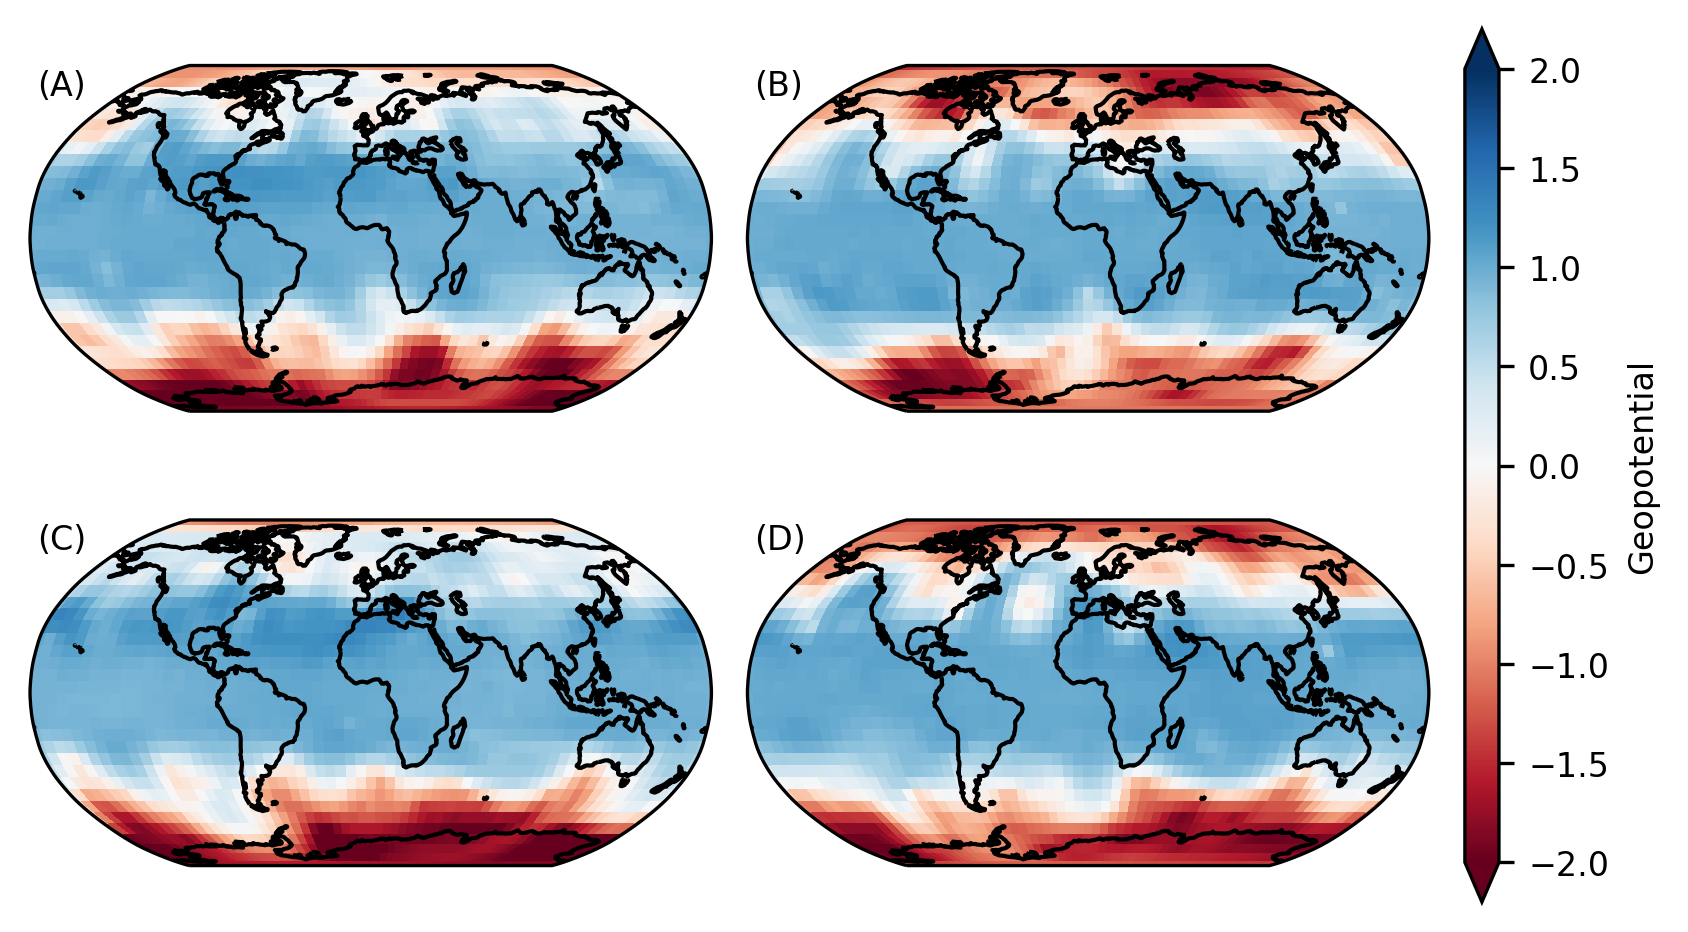

In [5]:
n_rows=2
n_cols=2

figure_width = textwidth
# calculate height from number of rows, cols and aspect ratio (+ do some fine tuning)
figure_height = textwidth * (n_rows / n_cols) / config["ASPECT_RATIO"]

fig = plt.figure(figsize = [figure_width, figure_height])
gs = gridspec.GridSpec(n_rows, n_cols+1, figure=fig, width_ratios=[1,1,0.05])

for i, timestep in enumerate(timesteps):
    ax = fig.add_subplot(gs[i//2,i%2], projection=config["PROJECTION"])
    # plot the map:
    plot_map(ax, data=sample_data[list(sample_data.keys())].sel({"time":timesteps[i]}), plotting_config=config)
    # add a lael to the panel of the plot:
    add_label_to_axes(ax, "({})".format(alphabet_letters[i]))

ax_cb=plt.subplot(gs[:,n_cols])  # create colorbar in extra column we created earlier
cbar = plt.colorbar(mappable=matplotlib.cm.ScalarMappable(cmap=config["CMAP"], norm=config["NORM"]), cax=ax_cb, extend=config["CBAR_EXTEND"])
cbar.set_label(config["CBAR_LABEL"])

fig.canvas.draw()
fig.tight_layout()

plt.show()

### Figure with individual colorbars:

In [6]:
# do configurations for plotting - these can also be shared or "inherited" for plots that are similar!

config = {
    "CMAP": "P",
    "NORM": matplotlib.colors.Normalize(vmin=-2, vmax=2),
    "RASTERIZED": True, # don't plot map pixels as individual points to make created files smaller
    "SHOW_COLORBAR": True,
    "CBAR_ORIENTATION": "horizontal",
    "CBAR_EXTEND": "both",
    "SHOW_COLORBAR_LABEL": True,
    "CBAR_LABEL": "Geopotential",
    "TITLE": "",
    "TITLE_FONTSIZE": 8,
    "PROJECTION": ccrs.Robinson(), # this is not called by plot_map, but by the function we create the entire plot with.
    "ASPECT_RATIO": 7/5  # can be used to calculate a figsize that looks nice for a given type of plot
}

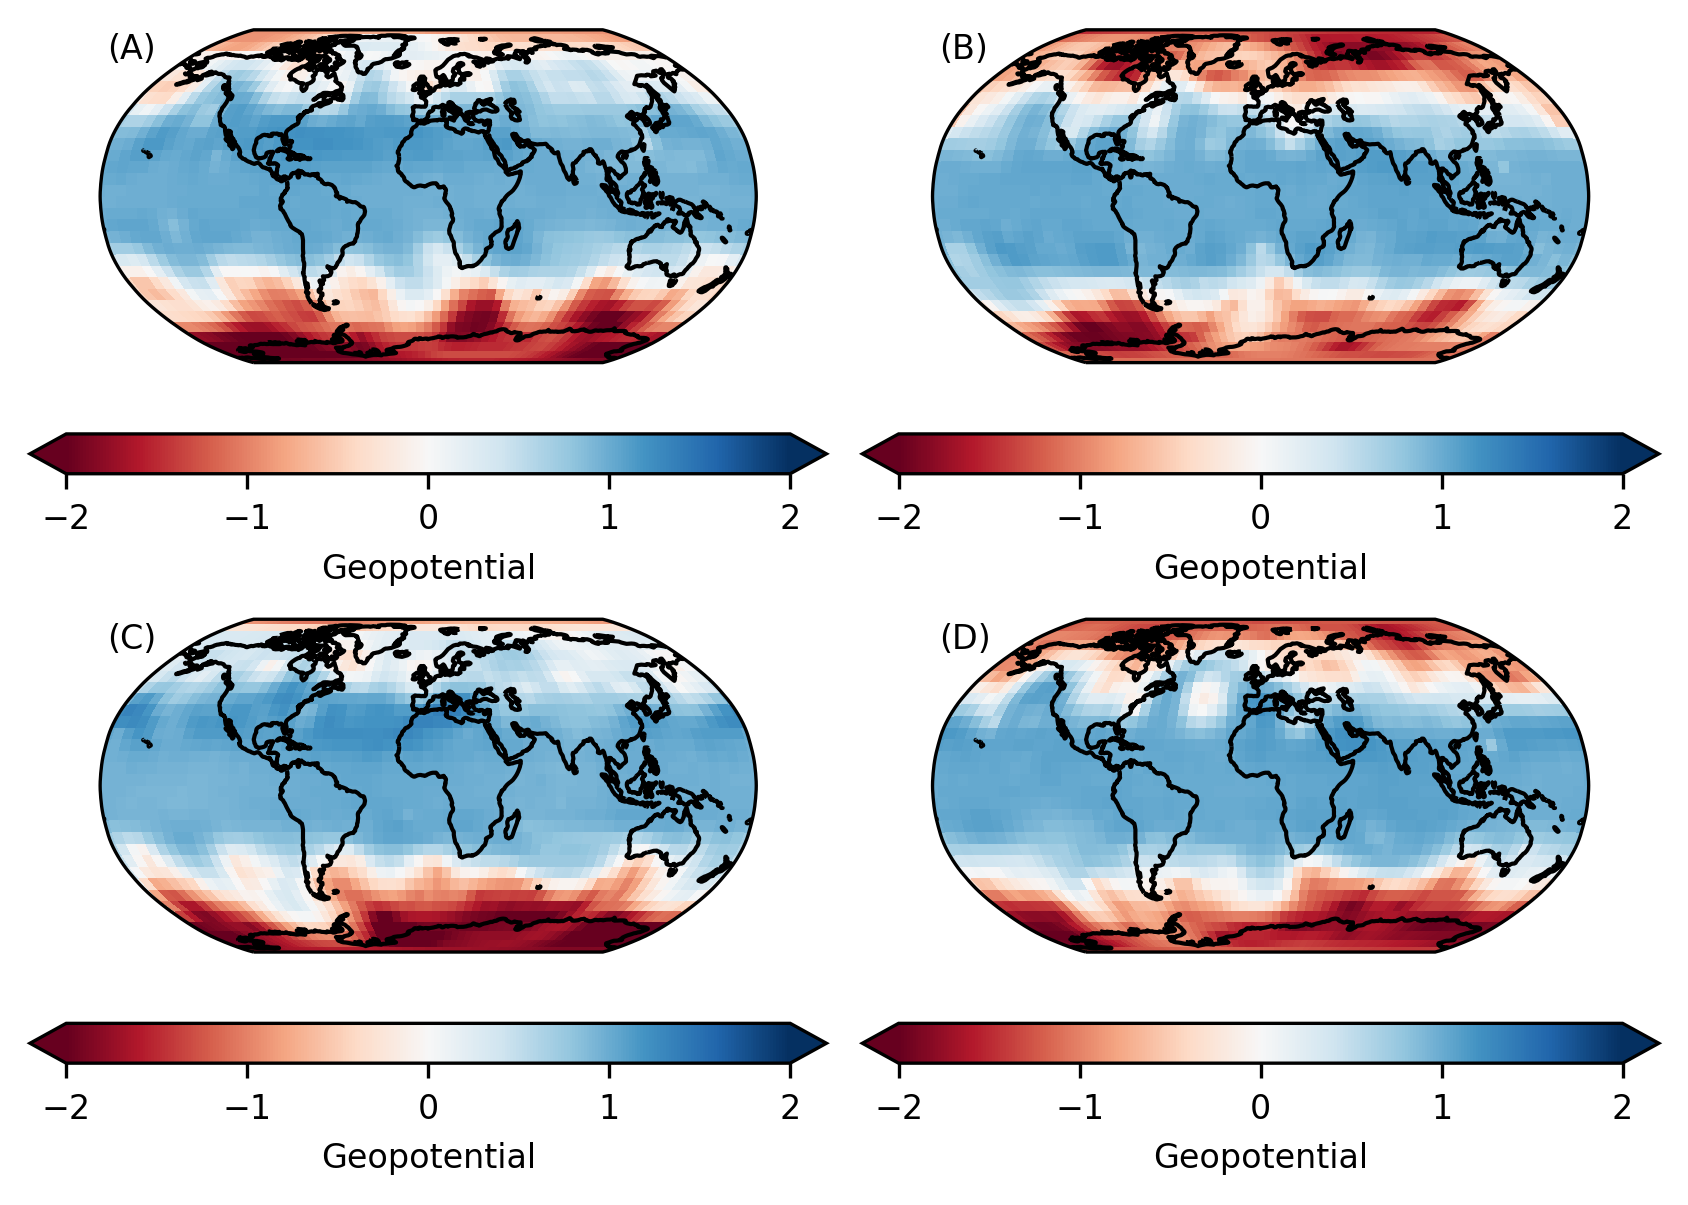

In [7]:
n_rows=2
n_cols=2

figure_width = textwidth
# calculate height from number of rows, cols and aspect ratio (+ do some fine tuning)
figure_height = textwidth * (n_rows / n_cols) / config["ASPECT_RATIO"]

fig = plt.figure(figsize = [figure_width, figure_height])
gs = gridspec.GridSpec(n_rows, n_cols, figure=fig, width_ratios=[1,1])

for i, timestep in enumerate(timesteps):
    ax = fig.add_subplot(gs[i//2,i%2], projection=config["PROJECTION"])
    # plot the map:
    plot_map(ax, data=sample_data[list(sample_data.keys())].sel({"time":timesteps[i]}), plotting_config=config)
    # add a lael to the panel of the plot:
    add_label_to_axes(ax, "({})".format(alphabet_letters[i]))

fig.canvas.draw()
fig.tight_layout()

plt.show()